In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [22]:
train_dir = r"C:\Users\naman\Desktop\final\train"
test_dir = r"C:\Users\naman\Desktop\final\test"

train_rock_dir = r"C:\Users\naman\Desktop\final\train\rock"
train_paper_dir = r"C:\Users\naman\Desktop\final\train\paper"
train_scissor_dir = r"C:\Users\naman\Desktop\final\train\scissor"

test_rock_dir = r"C:\Users\naman\Desktop\final\test\rock"
test_paper_dir = r"C:\Users\naman\Desktop\final\test\paper"
test_scissor_dir = r"C:\Users\naman\Desktop\final\test\scissor"

num_rock_tr = len(os.listdir(train_rock_dir))
num_paper_tr = len(os.listdir(train_paper_dir))
num_scissor_tr = len(os.listdir(train_scissor_dir))

num_rock_test = len(os.listdir(test_rock_dir))
num_paper_test = len(os.listdir(test_paper_dir))
num_scissor_test = len(os.listdir(test_scissor_dir))

total_train = num_scissor_tr + num_paper_tr + num_rock_tr  
total_test = num_rock_test + num_paper_test + num_scissor_test

print('total training rock images:', num_rock_tr)
print('total training paper images:', num_paper_tr)
print('total training scissor images:', num_scissor_tr)

print('total test rock images:', num_rock_test)
print('total test paper images:', num_paper_test)
print('total test scissor images:', num_scissor_test)
print("--")
print("Total training images:", total_train)
print("Total test images:", total_test)

total training rock images: 840
total training paper images: 840
total training scissor images: 840
total test rock images: 124
total test paper images: 124
total test scissor images: 124
--
Total training images: 2520
Total test images: 372


In [23]:
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [24]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5)

train_data_gen = image_gen_train.flow_from_directory(batch_size=5,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='categorical')

image_gen_test = ImageDataGenerator(rescale=1./255)

test_data_gen = image_gen_test.flow_from_directory(batch_size=5,
                                                 directory=test_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [25]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3)
])

In [26]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0

In [27]:
history = model.fit_generator(
    train_data_gen,
    epochs=10,
    validation_data=test_data_gen
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 504 steps, validate for 75 steps
Epoch 1/10
504/504 [==============================] - 19s 37ms/step - loss: 0.9664 - accuracy: 0.5437 - val_loss: 0.5600 - val_accuracy: 0.7231
Epoch 2/10
504/504 [==============================] - 16s 33ms/step - loss: 0.6379 - accuracy: 0.7262 - val_loss: 0.2480 - val_accuracy: 0.9409
Epoch 3/10
504/504 [==============================] - 17s 33ms/step - loss: 0.4931 - accuracy: 0.8056 - val_loss: 0.3014 - val_accuracy: 0.8360
Epoch 4/10
504/504 [==============================] - 16s 33ms/step - loss: 0.3728 - accuracy: 0.8560 - val_loss: 0.0518 - val_accuracy: 1.0000
Epoch 5/10
504/504 [==============================] - 16s 33ms/step - loss: 0.3402 - accuracy: 0.8639 - val_loss: 0.1469 - val_accuracy: 0.9462
Epoch 6/10
504/504 [==============================] - 16s 33ms/step - loss: 0.2861 - accuracy: 0.8964 - val_los

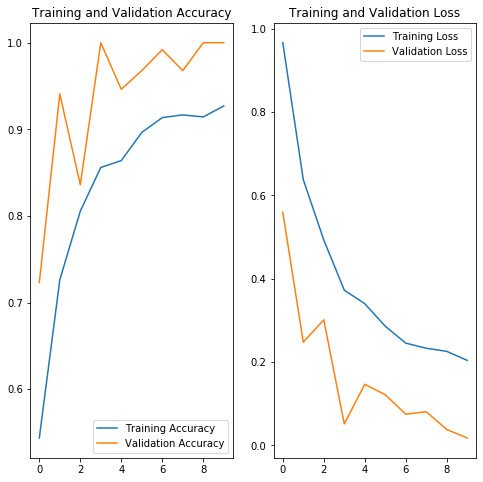

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [31]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json) 
model.save_weights('model.h5')    